K-Means Clustering
===

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time
import sys
from IPython.display import display, clear_output

%matplotlib inline

In [2]:
#Plot the clustering
def plot_clusters(labels, clusters, X,i):
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5, alpha=0.5)
        plt.plot(clusters[k,0],clusters[k,1],'o',markerfacecolor=col,
             markeredgecolor='k', markersize=20,alpha=0.8)
    plt.title('Clustering: Iteration %d'%(i))  

Generate Data
---

In [3]:
#Set cluster compactness
std=0.9

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1],[-1,1]]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=std,random_state=0)
X = StandardScaler().fit_transform(X)

Run KMeans
---

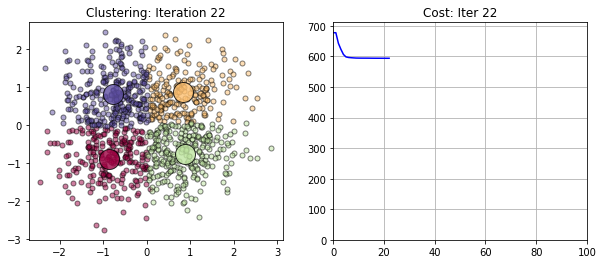

In [6]:
n_clusters=4 #Set Number of Clusters
L=100 # Number of learning steps
cost = np.zeros(L) #Custering cost

#Randomly Initialize the Clusters
centers = 2.5*(np.random.rand(n_clusters, 2)-0.5)
km = KMeans(n_clusters=n_clusters, n_init=1,init=centers,max_iter=1).fit(X)
km.cluster_centers_ =   centers

for i in range(L):

    labels = km.predict(X)
    centers = km.cluster_centers_
    cost[i] = km.inertia_
    
    km = KMeans(n_clusters=n_clusters, n_init=1,init=centers,max_iter=1).fit(X)
    
    clear_output(wait=True)
    plt.figure(101,figsize=(10,4))
    plt.subplot(1,2,1)
    plot_clusters(labels, centers, X,i)
      
    plt.subplot(1,2,2)
    plt.plot(cost[:i+1],'b-')
    plt.xlim(0,100)
    plt.ylim(0,1.05*max(cost[:i+1]))
    plt.title("Cost: Iter %d"%(i))
    plt.grid(True)
    
    plt.show()   
    if(i>10):
        if(np.abs(cost[i-1]-cost[i])<1e-6): break

# Your Task

Run K-means several times but varying the following 
- `std` (the cluster compactness, higher means the clusters are more compact) 
- `n_samples` (the number of data points) 
- `n_clusters` (the number of clusters) 

### Questions 
1. As the cluster compactness rises, what happens to the minimum cost found by k-means? 
1. How do you qualitative evaluations of the clusters found vary as the number of clusters vary? 
1. (Bonus): Create your own data-generting process (clusters you expect to find in the data) and see if k-means recovers the groups you created. 